# **Capstone project: Providing data-driven suggestions for HR**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe(include = "all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df = df0.rename(columns = {"average_montly_hours": "average_monthly_hours",
                          "time_spend_company":"duration", "Work_accident": "work_accident", "Department":"department"})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'duration', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
duration                 0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
df.duplicated().sum()

3008

In [9]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,duration,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df1= df.drop_duplicates(keep = "first")

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,duration,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


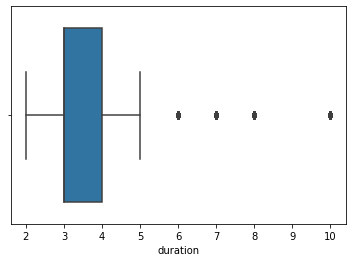

In [11]:
sns.boxplot(x = "duration", data = df1)
plt.show()

In [12]:
q1 = df1["duration"].quantile(0.25)
q3 = df1["duration"].quantile(0.75)
iqr = q3 - q1
UL = q3 + 1.5*iqr
LL = q1 - 1.5*iqr
print("Upper Limit = ",UL)
print("Lower Limit = ",LL)

Outliers = df1[(df1["duration"] > UL)|(df1["duration"] < LL)]
print(len(Outliers))

Upper Limit =  5.5
Lower Limit =  1.5
824


In [13]:
print (df1["left"].value_counts())
print("")
print (df1["left"].value_counts(normalize = True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


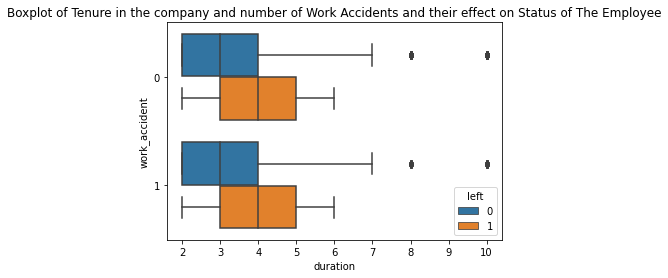

In [14]:
sns.boxplot(data = df1, x = "duration", y = "work_accident", hue="left", orient = "h")
plt.title("Boxplot of Tenure in the company and number of Work Accidents and their effect on Status of The Employee")
plt.show()

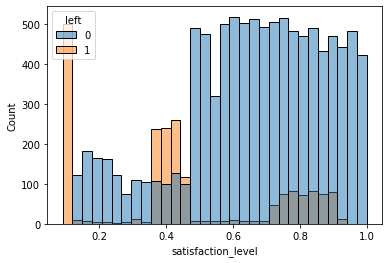

In [15]:
sns.histplot(data = df1, x = "satisfaction_level", hue="left")
plt.show()

In [16]:
df2 = pd.get_dummies(df1)
df2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,duration,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [22]:
dfm = df2[(df2["duration"] >= LL) & (df2["duration"] <= UL)]
dfm.head()
print(dfm.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   duration                11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   department_IT           11167 non-null  uint8  
 9   department_RandD        11167 non-null  uint8  
 10  department_accounting   11167 non-null  uint8  
 11  department_hr           11167 non-null  uint8  
 12  department_management   11167 non-null  uint8  
 13  department_marketing    11167 non-null  uint8  
 14  department_product_mng  11167 non-null

In [23]:
y = dfm["left"]

x = dfm.drop("left", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 17)

In [24]:
print(x_train.isna().sum())
print("")
print(y_train.isna().sum())

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
duration                  0
work_accident             0
promotion_last_5years     0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
salary_high               0
salary_low                0
salary_medium             0
dtype: int64

0


In [33]:
LR = LogisticRegression( random_state = 17, max_iter = 500).fit(x_train, y_train)

In [34]:
LR.coef_

array([[-4.58478543e+00, -5.75856096e-02, -4.98604387e-01,
         3.80474009e-03,  1.08423931e+00, -1.40228788e+00,
        -4.44963683e-01, -1.10594738e-01, -6.15637752e-01,
        -2.76186330e-01, -2.42603524e-02, -3.35268199e-02,
        -5.42845998e-02, -7.47682375e-02,  3.14622360e-02,
        -5.91416134e-02,  2.20966259e-02, -1.28958288e+00,
         2.17826363e-01, -1.23085060e-01]])

In [27]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
print('Accuracy Score = ', metrics.accuracy_score(y_test,y_pred))
print('Recall Score = ', metrics.recall_score(y_test,y_pred))
print('F1 Score = ', metrics.f1_score(y_test,y_pred))
print('Precision Score = ', metrics.precision_score(y_test,y_pred))

Accuracy Score =  0.8197552969262907
Recall Score =  0.24424778761061947
F1 Score =  0.3136363636363636
Precision Score =  0.4380952380952381


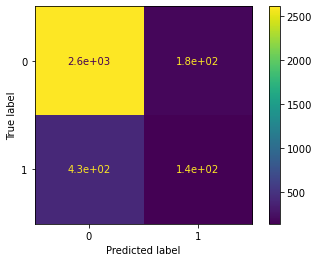

In [29]:
cm = metrics.confusion_matrix(y_test, y_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = LR.classes_)
Display.plot()

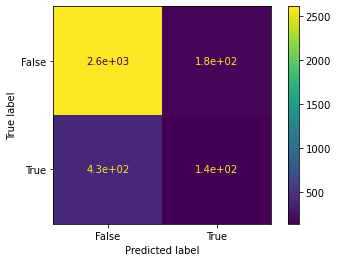

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = [False, True])
Display.plot()

In [35]:
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [36]:
RFC = RandomForestClassifier(random_state = 17)

In [37]:
clf = GridSearchCV(RFC, cv_params, cv = 5, refit = "f1")

In [38]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=17,
                                  

In [41]:
y_predR = clf.best_estimator_.predict(x_test)

In [42]:
print('Accuracy Score = ', metrics.accuracy_score(y_test,y_predR))
print('Recall Score = ', metrics.recall_score(y_test,y_predR))
print('F1 Score = ', metrics.f1_score(y_test,y_predR))
print('Precision Score = ', metrics.precision_score(y_test,y_predR))

Accuracy Score =  0.9838854073410922
Recall Score =  0.9132743362831859
F1 Score =  0.9502762430939227
Precision Score =  0.9904030710172744


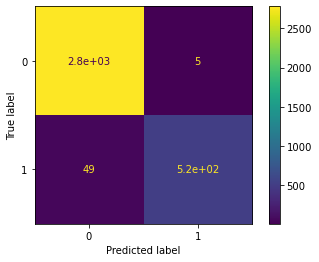

In [43]:
cm = metrics.confusion_matrix(y_test, y_predR)
Display = metrics.ConfusionMatrixDisplay(cm, display_labels = LR.classes_)
Display.plot()